In [1]:
import collections
import string
from datetime import datetime, timedelta

from httpx import Client
from lxml import html
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
c = Client(base_url="https://news.google.com/")
r = c.get('rss/search', params={'q': 'Russia', 'hl': 'en-US', 'gl': 'US', 'ceid': 'US:en'})
c.close()

In [3]:
h = html.fromstring(r.content)

In [4]:
TODAY = datetime.today()

ret = [
    e.xpath('./title')[0].text_content().rsplit('-', maxsplit=1)[0].strip() for e in h.xpath('//item')
    if (TODAY - datetime.strptime(e.xpath('./pubdate')[0].text, '%a, %d %b %Y %H:%M:%S %Z')).days <= 31
]

In [5]:
ret

['Russia and Belarus Inch Closer to a Full-Blown Merger',
 'Ukrainian president says war with Russia a worst-case possibility',
 'Germany Investigates Russia Over Pre-Election Hacking',
 'Russia Influences Hackers but Stops Short of Directing Them, Report Says',
 'Russia completes Nord Stream 2 construction, gas flows yet to start',
 'Russia to reinforce its Tajikistan base with new tanks',
 'China, Russia loom over routine air operations across the globe',
 'Senior Russian Minister Dies After Diving Off Cliff to Save Film Director',
 'Russia Hikes Rates Fifth Time in a Row, Leaves Room for More',
 'Iran, China and Russia make PR hay from U.S. Afghanistan withdrawal',
 "Russia's Tame Opposition Admits No Chance of Change in Parliamentary Vote",
 'Russian politician faces two near-identical opponents in election',
 "Russia says waits for Germany's nod to start gas sales via Nord Stream 2",
 'A Skeleton for Diplomacy: How a Plan to Reconcile France and Russia Collapsed',
 'Russian cosmon

In [6]:
def remove_suffixes(data):
    suffixes = (
        ' – Bitcoin News', ' - RIA', ' | The Independent Barents Observer',
        ' - Belta', ' - NASASpaceFlight.com', ' – Poll'
    )
    for scentence in data:
        for suffix in suffixes:
            if suffix in scentence:
                scentence = scentence.removesuffix(suffix)
        yield scentence

In [7]:
def tokenize(data):
    return (word_tokenize(x) for x in data)

In [8]:
def remove_digits_and_punctation(data):
    return (
        word for scentence in data for word in scentence
        if (not word.isdigit() and word not in string.punctuation)
    )

In [9]:
STOPWORDS.update(('russia', "'s", 'russian', 'russians', '‘', '–', '’', '...', 's'))

def remove_stop_words(data):
    return (word.lower() for word in data if word.lower() not in STOPWORDS)

In [10]:
def preprocess(data):
    data = remove_suffixes(data)
    data = tokenize(data)
    data = remove_digits_and_punctation(data)
    data = remove_stop_words(data)
    return data

In [11]:
ret = preprocess(ret)

In [12]:
for_cloud = collections.Counter(ret)

In [13]:
for_cloud = dict(sorted(for_cloud.items(), key = lambda pair: pair[1], reverse=True)[:50])

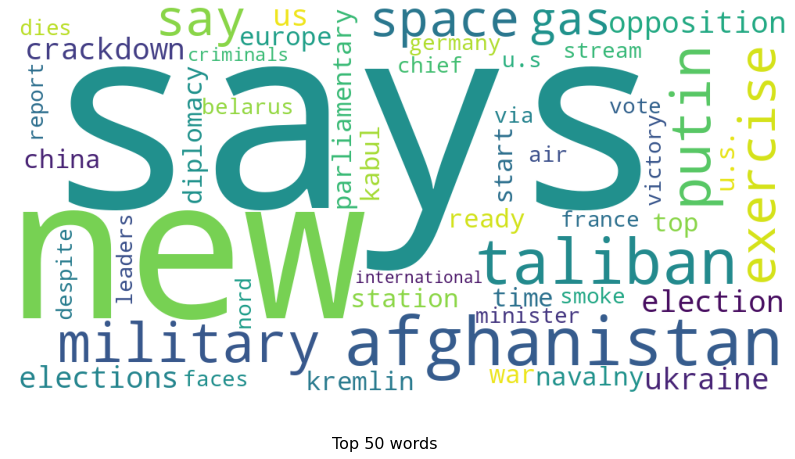

In [14]:
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
).generate_from_frequencies(for_cloud)

fig = plt.figure(1, figsize=(14,14))
plt.axis('off')
fig.suptitle("Top 50 words", fontsize = 16)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()